## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
source_df = pd.merge(mouse_metadata,study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
source_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(source_df['Mouse ID'].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = source_df[source_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice_df = duplicate_mice_df.set_index('Mouse ID')
duplicate_mice_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_source_df = source_df.set_index('Mouse ID')
clean_source_df = clean_source_df.drop(duplicate_mice_df.index)
clean_source_df.reset_index(inplace=True)
clean_source_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(clean_source_df['Mouse ID'].unique())
clean_num_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_grouped_df = pd.DataFrame({"Mean": mean_drug_grouped,
                                  "Median": median_drug_grouped,
                                  "Variance": var_drug_grouped,
                                  "Standard Deviation": stdev_drug_grouped,
                                  "Standard Error of the Mean": SEM_drug_grouped})
summary_grouped_df.head()

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = clean_source_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var','std', 'sem'])
summary_agg_df.rename(columns  = {"mean":"Mean", "median":"Median", 
                                  "var": "Variance", "std":"Standard Deviation",
                                 "sem": "Standard Error of the Mean"}, inplace = True)
summary_agg_df.columns = summary_agg_df.columns.droplevel()
summary_agg_df.head()

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

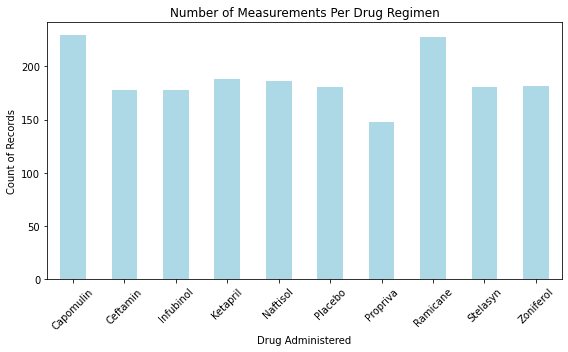

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_records = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
total_records.plot(kind="bar", color = 'lightblue', figsize=(8,5), width = 0.5, rot=45, 
                   title = "Number of Measurements Per Drug Regimen")

# Assign labels for the x and y axis
plt.xlabel("Drug Administered")
plt.ylabel("Count of Records")

# Save and show the graph
plt.tight_layout()
plt.savefig("Analysis/BarPandas.png")
plt.show()

In [9]:
# Create DataFrame with total number of measurements per drug regimen
total_measurements_df = clean_source_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].count()
total_measurements_df.reset_index(inplace=True)
total_measurements_df.rename(columns = {"Tumor Volume (mm3)": "Number of Measurements"}, inplace = True)

In [10]:
# Set x-axis and tick locations
x_axis = np.arange(len(total_measurements_df))
tick_locations = [value for value in x_axis]

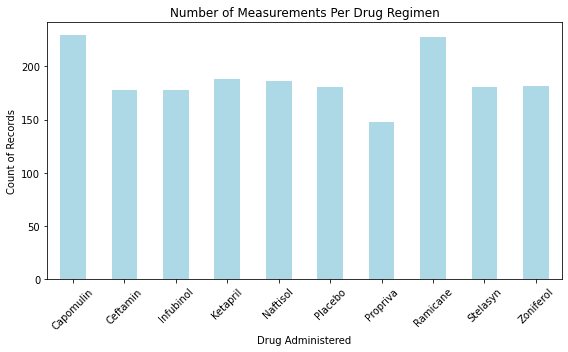

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(8,5))
plt.bar(x_axis, total_measurements_df['Number of Measurements'], color="lightblue", align="center", width = 0.5)
plt.xticks(tick_locations, total_measurements_df['Drug Regimen'], rotation = 45)
plt.xlim(-0.5, len(x_axis)-0.5)

# Set title and axis labels
plt.title("Number of Measurements Per Drug Regimen")
plt.xlabel("Drug Administered")
plt.ylabel("Count of Records")

# Save and show the graph
plt.tight_layout()
plt.savefig("Analysis/BarPyplot.png")
plt.show()

In [12]:
# Create DataFrame with count of number of Male vs. Female mice
mice_gender_df = clean_source_df.groupby('Sex')[['Mouse ID']].count()
mice_gender_df.rename(columns={'Mouse ID':''}, inplace=True)

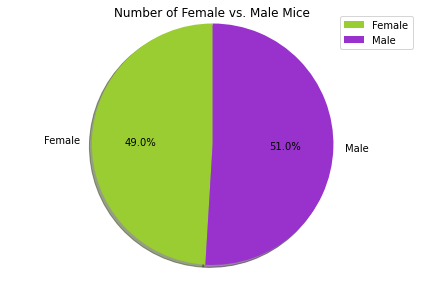

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["yellowgreen", "darkorchid"]
mice_gender_df.plot(kind='pie', subplots=True, shadow = True, startangle=90, 
                    autopct='%1.1f%%', colors = colors, title = "Number of Female vs. Male Mice")

# Set axis to equal to get a perfect circle
plt.axis("equal")

# Save and show the graph
plt.tight_layout()
plt.savefig("Analysis/PiePandas.png")
plt.show()

In [14]:
# Reset DataFrame index and assign values to variables to be used later
mice_gender_df.rename(columns={'':'Count by Sex'}, inplace=True)
updated_gender_df = mice_gender_df.reset_index()
updated_gender_df
labels = updated_gender_df['Sex']
count = updated_gender_df['Count by Sex']

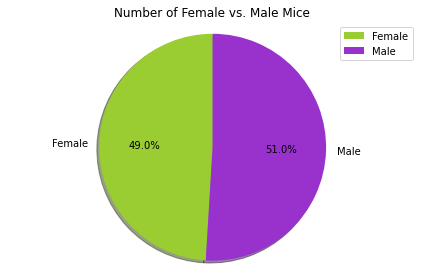

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Set title and legend
plt.title("Number of Female vs. Male Mice")
plt.axis("equal")
plt.legend(labels, loc = "best")

# Save and show graph
plt.tight_layout()
plt.savefig("Analysis/PiePyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_point_df = clean_source_df.groupby('Mouse ID')[['Timepoint']].max()
last_point_df.reset_index(inplace = True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_df = pd.merge(last_point_df, clean_source_df, how = "left", on = ["Mouse ID", "Timepoint"])
last_tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
tumor_vol = last_tumor_df.loc[last_tumor_df['Drug Regimen'] == "Capomulin"]

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    
 # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_tumor_df.loc[last_tumor_df['Drug Regimen']== drug]['Tumor Volume (mm3)']
    
    # add subset 
    volume_data.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


    outlier_tumor_vol = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(drug, outlier_tumor_vol)


Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


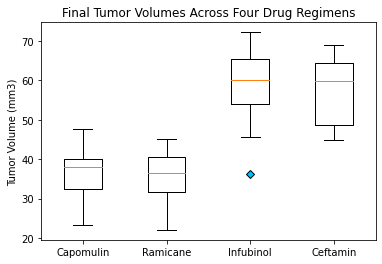

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_diamond = dict(markerfacecolor='deepskyblue', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes Across Four Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(volume_data, flierprops = blue_diamond, labels = treatments)
plt.savefig("Analysis/BoxPlot.png")
plt.show()

## Line and Scatter Plots

In [20]:
# Create DataFrame for information about mice reated with Capomulin
filtered_capomulin_df = clean_source_df[clean_source_df['Drug Regimen']== "Capomulin"][['Mouse ID', "Weight (g)",
                                                                                        'Timepoint','Tumor Volume (mm3)']]
filtered_capomulin_df.reset_index(drop=True, inplace=True)

# Select one Mouse ID and create DataFrame with related informaton
mouse_id = filtered_capomulin_df.iloc[0,0]
selected_mouse_df = filtered_capomulin_df[filtered_capomulin_df['Mouse ID'] == mouse_id]

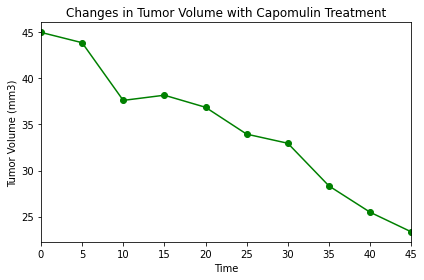

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(selected_mouse_df['Timepoint'], selected_mouse_df['Tumor Volume (mm3)'], color = "g", marker ='o')

# Set title, axis labels, and axis limits
plt.title("Changes in Tumor Volume with Capomulin Treatment")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(min(selected_mouse_df['Timepoint']), max(selected_mouse_df['Timepoint']))

# Save and display graph
plt.tight_layout()
plt.savefig("Analysis/LinePyplot.png")
plt.show()

In [22]:
# Create DataFrame grouped by Tumor Volume, for all mice treated with Capomulin
mean_vol_df = filtered_capomulin_df.groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]
mean_vol_df.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


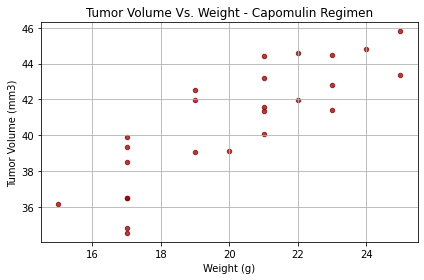

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mean_vol_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(6,4),
              title="Tumor Volume Vs. Weight - Capomulin Regimen", color = 'darkred', alpha=0.75)

# Set y-axis limits
plt.ylim(min(mean_vol_df['Tumor Volume (mm3)']) - 0.5, max(mean_vol_df['Tumor Volume (mm3)']) + 0.5)

# Save and display graph
plt.tight_layout()
plt.savefig("Analysis/ScatterPlot.png")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


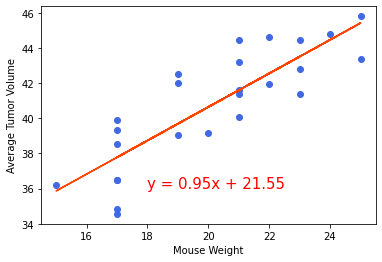

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mean_vol_df.iloc[:,0]
avf_tumor_vol = mean_vol_df.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avf_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = mean_vol_df.iloc[:,0]
y_values = mean_vol_df.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "royalblue")
plt.plot(x_values,regress_values,"orangered")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.savefig("Analysis/LinReg_ScatterPlot.png")
plt.show()